# Fitness Trackers

Práctica de Python de Programación Orientada a Ciencia de Datos

Autor: Antonio Fernández Cáceres

### 1. Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos descriptivos elementales de las variables del fichero. Una vez cargados los datos en nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores para cada una de las variables:

In [1]:
import math
import pandas as pd
import seaborn as sns

datos = pd.read_csv("Fitness_trackers.csv")
datos.head(10)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN
5,Xiaomi,FitnessBand,Band - HRX Edition,Black,"1,299","1,799",OLED Display,4.2,Plastic,20,NaN
6,Xiaomi,FitnessBand,Band 2,Black,"2,499","2,499",OLED Display,4.3,Plastic,7,NaN
7,Xiaomi,Smartwatch,Revolve,Black,"12,349","15,999",AMOLED Display,4.4,Silicone,14,2
8,Xiaomi,Smartwatch,RevolveActive,Black,"12,999","15,999",AMOLED Display,4.4,Silicone,14,3
9,Xiaomi,FitnessBand,Smart Band 3i,Black,"1,270","1,599",OLED Display,4.2,Thermoplastic polyurethane,7,NaN


Antes de proseguir, renombraremos las variables para facilitar su lectura y tratamiento:

In [2]:
datos = datos.rename(columns = {"Brand Name":"brand", "Device Type":"type", "Model Name":"model", "Color":"color", "Selling Price":"selling_price", "Original Price": "original_price", "Display":"display", "Rating (Out of 5)":"rating", "Strap Material":"strap_material", "Average Battery Life (in days)":"avg_battery_days", "Reviews":"reviews"})

datos.head()

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN


#### 1.1 Número de muestras (valores distintos de missing):

In [3]:
nMuestras = []
for column in datos.columns:
    nMuestras.append([column, len(datos[column].dropna())])
nMuestras

[['brand', 565],
 ['type', 565],
 ['model', 565],
 ['color', 565],
 ['selling_price', 565],
 ['original_price', 565],
 ['display', 565],
 ['rating', 514],
 ['strap_material', 565],
 ['avg_battery_days', 565],
 ['reviews', 78]]

**rating** y **reviews** tienen valores _missing_.

#### 1.2 y 1.3 Media, desviación estándar, mínimo y máximo de aquellas variables en las que tenga sentido (numéricas):

In [4]:
datos.dtypes

brand                object
type                 object
model                object
color                object
selling_price        object
original_price       object
display              object
rating              float64
strap_material       object
avg_battery_days      int64
reviews              object
dtype: object

Si comparamos los tipos asignados con los numéricos, vemos que además del **rating**  y **avg_battery_days** también deberían ser numéricos **selling_price**, **original_price** y **reviews**

Si buscamos precios de losTrackers en internet, sabiendo que las ventas pertenecen a la India (los precios están en Rupias), tras una simple búsqueda en Google nos daremos cuenta de que **los precios con los que tratamos son números enteros**.

Convertimos las tres variables a tipo numérico, eliminando previamente las comas de miles:

In [5]:
datos["selling_price"] = pd.to_numeric(datos["selling_price"].str.replace(',',''))
datos["original_price"] = pd.to_numeric(datos["original_price"].str.replace(',',''))
datos["reviews"] = pd.to_numeric(datos["reviews"].str.replace(',',''))

Confirmamos que las conversiones son correctas:

In [6]:
datos.head(10)

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN
5,Xiaomi,FitnessBand,Band - HRX Edition,Black,1299,1799,OLED Display,4.2,Plastic,20,NaN
6,Xiaomi,FitnessBand,Band 2,Black,2499,2499,OLED Display,4.3,Plastic,7,NaN
7,Xiaomi,Smartwatch,Revolve,Black,12349,15999,AMOLED Display,4.4,Silicone,14,2.0
8,Xiaomi,Smartwatch,RevolveActive,Black,12999,15999,AMOLED Display,4.4,Silicone,14,3.0
9,Xiaomi,FitnessBand,Smart Band 3i,Black,1270,1599,OLED Display,4.2,Thermoplastic polyurethane,7,NaN


In [7]:
datos.dtypes

brand                object
type                 object
model                object
color                object
selling_price         int64
original_price        int64
display              object
rating              float64
strap_material       object
avg_battery_days      int64
reviews             float64
dtype: object

Verificamos que no se hayan creado nuevos valores missing:

In [8]:
nMuestras2 = []
for column in datos.columns:
    nMuestras2.append([column, len(datos[column].dropna())])

nMuestras==nMuestras2

True

Con los datos numéricos en orden, procedemos a calcular los valores solicitados:

In [9]:
variablesNumericas = datos._get_numeric_data()
mediaNumericas = round(variablesNumericas.mean(), 3) # No hay que preocuparse por los NaN, puesto que quedan excluídos del cálculo
stdNumericas = round(variablesNumericas.std(), 3)
minNumericas = round(variablesNumericas.min(), 3)
maxNumericas = round(variablesNumericas.max(), 3)

valoresInteres = pd.DataFrame([mediaNumericas,stdNumericas,minNumericas,maxNumericas], columns=["selling_price","original_price", "rating", "avg_battery_days", "reviews"])
valoresInteres["Valor"] = ["Media", "Desviación Estándar", "Mínimo", "Máximo"]
valoresInteres.set_index("Valor", inplace = True)

valoresInteres

,selling_price,original_price,rating,avg_battery_days,reviews
Valor,,,,,
Media,22110.373,25365.361,4.230,9.027,2492.949
Desviación Estándar,19914.926,20384.029,0.391,7.869,5607.530
Mínimo,1195.000,1599.000,2.000,1.000,2.000
Máximo,122090.000,122090.000,5.000,45.000,23426.000


Antes de continuar, vamos a revisar que en las variables de tipo texto no haya variaciones indeseadas:

In [10]:
sorted(list(set(datos["brand"])))

['APPLE',
 'FOSSIL ',
 'Fastrack',
 'FitBit',
 'GARMIN ',
 'GOQii',
 'Honor',
 'Huawei',
 'Infinix',
 'LAVA',
 'LCARE',
 'Noise',
 'Noise ',
 'OnePlus ',
 'Oppo',
 'SAMSUNG ',
 'Xiaomi',
 'boAt ',
 'huami',
 'realme']

Hay una marca, "Noise", duplicada. Esto es debido a que en ocasiones existen espacios antes y después de los nombres. Es muy común que esto suceda también por diferencias de mayúsculas/minúsculas. Para homogeneizarlos y eliminar duplicados, quitaremos los espacios de los extremos de cada marca y las convertiremos todas a minúsculas:

In [11]:
datos["brand"]=datos["brand"].str.strip().str.lower()

sorted(list(set(datos["brand"])))

['apple',
 'boat',
 'fastrack',
 'fitbit',
 'fossil',
 'garmin',
 'goqii',
 'honor',
 'huami',
 'huawei',
 'infinix',
 'lava',
 'lcare',
 'noise',
 'oneplus',
 'oppo',
 'realme',
 'samsung',
 'xiaomi']

In [12]:
sorted(list(set(datos["type"])))

['FitnessBand', 'Smartwatch']

In [13]:
sorted(list(set(datos["model"])))

['2 - 42 mm Silver Aluminium Case',
 '2 Pro',
 '2S',
 '38 mm Space Black Stainless Steel Case',
 '38 mm Stainless Steel Stainless Steel Case with Modern Buckle',
 '41mm',
 '42 mm Black Stainless Steel Case with Link Bracelet',
 '42 mm Space Gray Aluminium',
 '42 mm Stainless Steel Case',
 '42 mm White Ceramic Case with Cloud Sport',
 '46 mm',
 '4th Gen Explorist HR',
 '4th Gen Venture HR',
 '5th Gen Julianna',
 '8 mm Stainless Steel Case',
 'Activity Tracker',
 'Alta',
 'Alta HR',
 'Amazfit Bip',
 'Amazfit Bip Lite',
 'Amazfit Bip S',
 'Amazfit Bip S Lite',
 'Amazfit Bip U',
 'Amazfit GTR 2 Aluminium',
 'Amazfit GTR 2 Stainless Steel',
 'Amazfit GTR 42',
 'Amazfit GTR 42 mm Glitter',
 'Amazfit GTR 47',
 'Amazfit GTS',
 'Amazfit GTS 2',
 'Amazfit GTS 2e',
 'Amazfit Neo',
 'Amazfit Pace',
 'Amazfit Stratos',
 'Amazfit Stratos 3',
 'Amazfit T-Rex',
 'Amazfit Verge',
 'Amazfit Verge Lite',
 'Approach S12',
 'Approach S20',
 'Approach S62',
 'Band',
 'Band - HRX Edition',
 'Band 2',
 'Band 

In [14]:
sorted(list(set(datos["color"])))

['Beige',
 'Black',
 'Black ',
 'Black Milanese',
 'Black Woven',
 'Black, Beige',
 'Black, Blue',
 'Black, Blue, Pink',
 'Black, Blue, Red',
 'Black, Blue, Teal',
 'Black, Brown',
 'Black, Deep Wine, Blue, Grey, Teal',
 'Black, Desert Rose, Lunar White',
 'Black, Gold',
 'Black, Green',
 'Black, Green, Yellow',
 'Black, Grey',
 'Black, Grey, Red',
 'Black, Orange, Red',
 'Black, Pink',
 'Black, Pink, Beige',
 'Black, Pink, White',
 'Black, Plum, Grey',
 'Black, Purple, Teal, Blue',
 'Black, Red',
 'Black, Red ',
 'Black, Red, Blue',
 'Black, Red, Orange',
 'Black, Silver',
 'Black, Silver ',
 'Black, Silver, White',
 'Black, Teal Green, Grey',
 'Black, White',
 'Black, White ',
 'Blue',
 'Blue ',
 'Blue Modern',
 'Blue Sapphire',
 'Blue, Black',
 'Blue, Black, Gray',
 'Blue, Orange',
 'Blue, Silver',
 'Bluw, White ',
 'Brown',
 'Brown, Black',
 'Brown, Gold',
 'Brown, Grey',
 'Cerise',
 'Charcoal',
 'Charcoal ',
 'Charcoal Black, Beige Gold',
 'Charcoal Grey, Black, Pink',
 'Cloud',
 

Con **color** pasa como con **brand**. Corregimos los nombres de los colores:

In [15]:
datos["color"]=datos["color"].str.strip().str.lower()

datos["color"]=datos["color"].str.replace("bluw", "blue") # Corrección de una palabra mal escrita

sorted(list(set(datos["color"])))

['beige',
 'black',
 'black milanese',
 'black woven',
 'black, beige',
 'black, blue',
 'black, blue, pink',
 'black, blue, red',
 'black, blue, teal',
 'black, brown',
 'black, deep wine, blue, grey, teal',
 'black, desert rose, lunar white',
 'black, gold',
 'black, green',
 'black, green, yellow',
 'black, grey',
 'black, grey, red',
 'black, orange, red',
 'black, pink',
 'black, pink, beige',
 'black, pink, white',
 'black, plum, grey',
 'black, purple, teal, blue',
 'black, red',
 'black, red, blue',
 'black, red, orange',
 'black, silver',
 'black, silver, white',
 'black, teal green, grey',
 'black, white',
 'blue',
 'blue modern',
 'blue sapphire',
 'blue, black',
 'blue, black, gray',
 'blue, orange',
 'blue, silver',
 'blue, white',
 'brown',
 'brown, black',
 'brown, gold',
 'brown, grey',
 'cerise',
 'charcoal',
 'charcoal black, beige gold',
 'charcoal grey, black, pink',
 'cloud',
 'cocoa',
 'cyprus green',
 'deep navy',
 'dual color',
 'dynamic orange',
 'flame red',
 

Además, comprobamos que cada observación de **model** y **color** puede consistir en más de un artículo/color respectivamente. Podríamos dividir sus valores y repartirlos en nuevas variables para ahondar en el análisis, pero dado que no se preguntará por ello más adelante y que el trabajo ha salido algo extenso, creo que no tiene mucha aplicación práctica y prefiero no añadir más complejidad. Trataremos cada observación como un pack de venta.

In [16]:
sorted(list(set(datos["display"])))

['AMOLED Display',
 'LCD Display',
 'LED Display',
 'OLED Display',
 'OLED Retina Display',
 'PMOLED Display',
 'TFT-LCD Display']

In [17]:
sorted(list(set(datos["strap_material"])))

['Aluminium',
 'Elastomer',
 'Fabric',
 'Leather',
 'Leather ',
 'Nylon',
 'Plastic',
 'Rubber',
 'Silicone',
 'Stainless Steel',
 'Thermoplastic polyurethane',
 'leather']

Con **strap_material** pasa como con **brand**. Corregimos los nombres de los materiales de la correa:

In [18]:
datos["strap_material"]=datos["strap_material"].str.strip().str.lower()

sorted(list(set(datos["strap_material"])))

['aluminium',
 'elastomer',
 'fabric',
 'leather',
 'nylon',
 'plastic',
 'rubber',
 'silicone',
 'stainless steel',
 'thermoplastic polyurethane']

### 2. Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:
* Por tipo de dispositivo



In [19]:
# Tipos de dispositivo:

tiposDisp = list(set(datos["type"]))
print(tiposDisp)

['FitnessBand', 'Smartwatch']


* Por precio de venta. Estableceremos cuatro grupos en base a la media del precio de venta de cada tipo de dispositivo:
 * Smartwatches con un precio inferior o igual a la media de precios de venta de estos dispositivos
 * Smartwatches con un precio superior a la media de precios de venta de estos dispositivos
 * Fitnessbands con un precio inferior o igual a la media de precios de venta de estos dispositivos
 * Fitnessbands con un precio superior a la media de precios de venta de estos dispositivos

In [20]:
# Precio medio de un Smartwatch:

swMedia = datos.loc[datos["type"]=="Smartwatch", "selling_price"].mean()

# Precio medio de una FitnessBand:

fbMedia = datos.loc[datos["type"]=="FitnessBand", "selling_price"].mean()


# Condiciones a cumplir:

swBajoMedia = (datos["selling_price"] <= swMedia) & (datos["type"] == "Smartwatch")
swSobreMedia = (datos["selling_price"] > swMedia) & (datos["type"] == "Smartwatch")
fbBajoMedia = (datos["selling_price"] <= fbMedia) & (datos["type"] == "FitnessBand")
fbSobreMedia = (datos["selling_price"] > fbMedia) & (datos["type"] == "FitnessBand")

* Por marca

In [21]:
# Lista de marcas:

marcas = list(set(datos["brand"]))
print(marcas)

['honor', 'realme', 'huawei', 'oppo', 'apple', 'xiaomi', 'goqii', 'oneplus', 'fossil', 'fastrack', 'lcare', 'fitbit', 'noise', 'lava', 'infinix', 'samsung', 'boat', 'huami', 'garmin']


#### 2.1 Calcula los siguientes estadísticos en base a cada una de las agrupaciones definidas previamente con respecto a las variables selling_price, original_price, rating, avg_battery_days in days y reviews:

In [22]:
datosFilt = datos[["type", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]]

##### 2.1.1 Número de observaciones

Por tipo de dispositivo:

In [23]:
obsPorTipo = datosFilt.groupby("type").count()
obsPorTipo

,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,75,75,75,75,13
Smartwatch,490,490,439,490,65


La mayoría de observaciones del dataset (un 86,7%) son Smartwatches. Hay valores faltantes en los ratings de los Smartwatches, y en las reviews de ambas categorías.

Por precio de venta:

In [24]:
datosswBajoMedia = datosFilt.loc[swBajoMedia].groupby("type").count()
datosswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

datosswSobreMedia = datosFilt.loc[swSobreMedia].groupby("type").count()
datosswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

datosfbBajoMedia = datosFilt.loc[fbBajoMedia].groupby("type").count()
datosfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

datosfbSobreMedia = datosFilt.loc[fbSobreMedia].groupby("type").count()
datosfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

obsPorPrecio = datosfbBajoMedia.append(datosfbSobreMedia).append(datosswBajoMedia).append(datosswSobreMedia)
obsPorPrecio.index.names = ['Grupos por precio de venta']

obsPorPrecio

,selling_price,original_price,rating,avg_battery_days,reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,45,45,45,45,12
FitnessBands sobre precio medio,30,30,30,30,1
Smartwatches bajo precio medio,323,323,306,323,65
Smartwatches sobre precio medio,167,167,133,167,0


Independientemente del tipo de dispositivo, hay másTrackers bajo el precio medio de venta que sobre el mismo. En general, hay pocosTrackers con reviews. Aquellos sobre el precio medio de venta tienen una o ninguna review. La mayoría de reviews (un 83,3%) son de Smartwatches bajo el precio medio.

Por marca:

In [25]:
obsMarca = datos[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").count().sort_values(by=["selling_price"], ascending = False)
obsMarca

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
fossil,133,133,133,133,15
garmin,101,101,50,101,0
apple,86,86,86,86,0
fitbit,51,51,51,51,0
samsung,48,48,48,48,0
huami,36,36,36,36,32
huawei,26,26,26,26,0
honor,20,20,20,20,20
noise,19,19,19,19,0


Podemos observar que las marcas que másTrackers han vendido son Fossil, Garmin, Apple, Fitbit y Samsung. Las que menos, Infinix y Lava.

##### 2.1.2 Número de valores ausentes (missing)

Por tipo de dispositivo:

In [26]:
ausentesPorTipo = datosFilt.set_index("type")
ausentesPorTipo = ausentesPorTipo.isna().groupby("type").sum()
ausentesPorTipo

,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,0,0,0,0,62
Smartwatch,0,0,51,0,425


Volvemos a comprobar que los valores faltantes se encuentran en los ratings de los smartwatches y en las reviews.

Por precio de venta:

In [27]:
ausentesswBajoMedia = datosFilt.loc[swBajoMedia]
ausentesswBajoMedia = ausentesswBajoMedia.set_index("type")
ausentesswBajoMedia = ausentesswBajoMedia.isna().groupby("type").sum()
ausentesswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

ausentesswSobreMedia = datosFilt.loc[swSobreMedia]
ausentesswSobreMedia = ausentesswSobreMedia.set_index("type")
ausentesswSobreMedia = ausentesswSobreMedia.isna().groupby("type").sum()
ausentesswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

ausentesfbBajoMedia = datosFilt.loc[fbBajoMedia]
ausentesfbBajoMedia = ausentesfbBajoMedia.set_index("type")
ausentesfbBajoMedia = ausentesfbBajoMedia.isna().groupby("type").sum()
ausentesfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

ausentesfbSobreMedia = datosFilt.loc[fbSobreMedia]
ausentesfbSobreMedia = ausentesfbSobreMedia.set_index("type")
ausentesfbSobreMedia = ausentesfbSobreMedia.isna().groupby("type").sum()
ausentesfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

ausentesPorPrecio = ausentesfbBajoMedia.append(ausentesfbSobreMedia).append(ausentesswBajoMedia).append(ausentesswSobreMedia)
ausentesPorPrecio.index.names = ['Ausentes agrupados por precio de venta']

ausentesPorPrecio

,selling_price,original_price,rating,avg_battery_days,reviews
Ausentes agrupados por precio de venta,,,,,
FitnessBands bajo precio medio,0,0,0,0,33
FitnessBands sobre precio medio,0,0,0,0,29
Smartwatches bajo precio medio,0,0,17,0,258
Smartwatches sobre precio medio,0,0,34,0,167


Por marca:

In [28]:
datosMarca = datos[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]]
ausentesMarca = datosMarca.set_index("brand")
ausentesMarca = ausentesMarca.isna().groupby("brand").sum()
ausentesMarca

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
apple,0,0,0,0,86
boat,0,0,0,0,0
fastrack,0,0,0,0,6
fitbit,0,0,0,0,51
fossil,0,0,0,0,118
garmin,0,0,51,0,101
goqii,0,0,0,0,4
honor,0,0,0,0,0
huami,0,0,0,0,4


La única marca con valores faltantes de **rating** es Garmin. Si cotejamos con los dos subapartados anteriores comprobaremos que todos los valores faltantes de esta variable pertenecen a Smartwatches marca Garmin. Los valores faltantes de reviews están más repartidos entre marcas.

##### 2.1.2 Mediana

Por tipo de dispositivo:

In [29]:
medianaPorTipo = datosFilt.groupby("type").median()
medianaPorTipo

,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,2999.0,3999.0,4.2,7.0,4628.0
Smartwatch,18990.0,21990.0,4.3,7.0,259.0


Se observa que la mediana del precio de los Smartwatches, que es el precio bajo el que se encuentran la mitad de sus observaciones, es aproximadamente entre 5 y 6 veces mayor que la de las FitnessBands. También se comprueba que la mediana del número de reviews de las FitnessBands es casi 18 veces mayor que el de los Smartwatches.

Por precio de venta:

In [30]:
medianaswBajoMedia = datosFilt.loc[swBajoMedia].groupby("type").median()
medianaswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

medianaswSobreMedia = datosFilt.loc[swSobreMedia].groupby("type").median()
medianaswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

medianafbBajoMedia = datosFilt.loc[fbBajoMedia].groupby("type").median()
medianafbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

medianafbSobreMedia = datosFilt.loc[fbSobreMedia].groupby("type").median()
medianafbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

medianaPorPrecio = medianafbBajoMedia.append(medianafbSobreMedia).append(medianaswBajoMedia).append(medianaswSobreMedia)
medianaPorPrecio.index.names = ['Grupos por precio de venta']

medianaPorPrecio

,selling_price,original_price,rating,avg_battery_days,reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,2199.0,2999.0,4.1,7.0,4628.0
FitnessBands sobre precio medio,8994.5,14494.5,4.3,7.0,77.0
Smartwatches bajo precio medio,13495.0,16999.0,4.2,7.0,259.0
Smartwatches sobre precio medio,40900.0,43900.0,4.5,7.0,NaN


Se observa que la mediana de las reviews de los Smartwatches sobre precio medio es NaN. Lógico, puesto que anteriormente se verificó que esta categoría no tiene reviews.

También se verifica que la mediana de l precio de venta de las FitnessBands sobre el precio medio no llega a la de los Smartwatches bajo el precio medio, lo cual es otro indicativo de que las FitnessBands son, en general, mucho más baratas que los Smartwatches.

La mediana de los ratings es, en general, muy favorable. Es algo más alta si el dispositivo está sobre el precio medio y especialmente si se trata de un Smartwatch.

Por marca:

In [31]:
medianaMarca = datos[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").median().sort_values(by=["selling_price"], ascending = False)
medianaMarca

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
apple,45690.0,49900.0,4.60,1.0,NaN
garmin,28990.0,31490.0,4.20,14.0,NaN
samsung,21989.5,27240.0,4.30,14.0,NaN
oppo,16490.0,22490.0,3.90,14.0,484.0
fitbit,14990.0,15999.0,4.20,7.0,NaN
fossil,13495.0,16495.0,4.30,2.0,46.0
huawei,11990.0,20490.0,4.25,14.0,NaN
huami,5999.0,12999.0,4.20,14.0,489.0
realme,4460.0,6499.0,4.10,10.5,633.0


En este caso sucede lo mismo que con la mediana. La varianza es NaN para todas aquellas marcas que no tienen reviews.

Las marcas con una mediana más alta en su precio de venta son Apple, Garmin, Samsung, Oppo y FitBit.

##### 2.1.4 Varianza (calcularemos la desviación estándar, que es más útil. Calcular la varianza sería lo mismo cambiando "std" por "var")

Por tipo de dispositivo:

In [32]:
stdPorTipo = round(datosFilt.groupby("type").std(), 3)
stdPorTipo

,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,4428.854,6231.133,0.317,3.089,8418.510
Smartwatch,20138.247,20400.166,0.398,8.347,3771.094


El precio de los Smartwatches tiene una desviación estándar casi 5 veces mayor que las FitnessBands, lo cual indica que, además de ser más caros en general, los hay de precios más dispares (presumiblemente según marca y prestaciones).

Se ve claramente que en los Smartwatches la vida de la batería oscila más que en el caso de las FitnessBands. Parece una prestación a tener en cuenta, sobre todo cara al precio de los Smartwatches.

Por precio de venta:

In [33]:
stdswBajoMedia = round(datosFilt.loc[swBajoMedia].groupby("type").std(), 3)
stdswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

stdswSobreMedia = round(datosFilt.loc[swSobreMedia].groupby("type").std(), 3)
stdswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

stdfbBajoMedia = round(datosFilt.loc[fbBajoMedia].groupby("type").std(), 3)
stdfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

stdfbSobreMedia = round(datosFilt.loc[fbSobreMedia].groupby("type").std(), 3)
stdfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

stdPorPrecio = stdfbBajoMedia.append(stdfbSobreMedia).append(stdswBajoMedia).append(stdswSobreMedia)
stdPorPrecio.index.names = ['Grupos por precio de venta']

stdPorPrecio

,selling_price,original_price,rating,avg_battery_days,reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,974.786,1593.549,0.360,3.666,8334.994
FitnessBands sobre precio medio,3508.320,5705.739,0.190,1.680,NaN
Smartwatches bajo precio medio,6147.754,6681.278,0.396,6.035,3771.094
Smartwatches sobre precio medio,19448.227,20244.836,0.330,11.581,NaN


La desviación estándar de las reviews no se puede calcular cuando hay una o ninguna observación en la categoría.

Cuanto más barato es el dispositivo, menor es la desviación de su precio, independientemente del tipo de dispositivo.

Las FitnessBands caras tienen menor variación de la duración de la batería que las baratas, y en el caso de los Smartwatches es al contrario.

Por marca:

In [34]:
stdMarca = round(datos[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").std().sort_values(by=["selling_price"], ascending = False), 3)
stdMarca

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
garmin,20748.706,22890.223,0.615,10.416,NaN
apple,20606.442,20159.821,0.185,0.000,NaN
huawei,13242.405,12827.351,0.325,3.473,NaN
samsung,10162.215,10716.390,0.463,3.279,NaN
oneplus,6997.380,7874.854,0.100,4.041,NaN
fitbit,5787.428,6025.407,0.185,0.832,NaN
fossil,5031.257,4241.272,0.392,5.240,146.426
honor,4745.051,6859.975,0.376,5.609,7898.383
xiaomi,4544.016,5778.322,0.258,4.223,0.707


Mismo caso que en el cálculo por grupos de precio de venta: si solo hay una o ninguna observación no se puede calcular la desviación estándar.

La mayor varianza de precios se da en aquellas marcas que vimos anteriormente que eran las más caras.

##### 2.1.5 Valores mínimo y máximo

Por tipo de dispositivo:

In [35]:
print("Mínimos por tipo de dispositivo:")

minPorTipo = datosFilt.groupby("type").min() # TODO preguntar si se quiere varianza o std
minPorTipo

Mínimos por tipo de dispositivo:


,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,1195,1599,2.8,3,77.0
Smartwatch,1395,1995,2.0,1,2.0


Teniendo ambos tipos unas medianas tan dispares en el precio, se comprueba que en cuanto a precios mínimos no andan muy lejos. Algo que llama la atención es que el mínimo de días de batería promedio es de 3 en el caso de las FitnessBand y de 1 en los Smartwatches, que por lo general son más caros.

In [36]:
print("Máximos por tipo de dispositivo:")

maxPorTipo = datosFilt.groupby("type").max() # TODO preguntar si se quiere varianza o std
maxPorTipo

Máximos por tipo de dispositivo:


,selling_price,original_price,rating,avg_battery_days,reviews
type,,,,,
FitnessBand,16999,38500,4.7,20,23426.0
Smartwatch,122090,122090,5.0,45,23069.0


Si nos vamos a los valores más altos, Comprobamos que el mejor Smartwatch tiene más del doble de batería que la mejor FitnessBand. Eso sí, el máximo precio de venta de una FitnessBand es 7 veces menor que el de un Smartwatch.

Por precio de venta:

In [37]:
print("Mínimos por precio de venta:")

minswBajoMedia = round(datosFilt.loc[swBajoMedia].groupby("type").min(), 3)
minswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

minswSobreMedia = round(datosFilt.loc[swSobreMedia].groupby("type").min(), 3)
minswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

minfbBajoMedia = round(datosFilt.loc[fbBajoMedia].groupby("type").min(), 3)
minfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

minfbSobreMedia = round(datosFilt.loc[fbSobreMedia].groupby("type").min(), 3)
minfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

minPorPrecio = minfbBajoMedia.append(minfbSobreMedia).append(minswBajoMedia).append(minswSobreMedia)
minPorPrecio.index.names = ['Grupos por precio de venta']

minPorPrecio

Mínimos por precio de venta:


,selling_price,original_price,rating,avg_battery_days,reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,1195,1599,2.8,3,122.0
FitnessBands sobre precio medio,5499,5499,3.8,5,77.0
Smartwatches bajo precio medio,1395,1995,2.0,1,2.0
Smartwatches sobre precio medio,24989,24990,3.2,1,NaN


El mínimo de reviews de los smartwatches sobre precio medio es NaN debido a que este grupo no tiene reviews.

Resulta curioso ver que la mínima batería de un Smartwatch es 1 día, independientemente de si su precio de venta está sobre o debajo de la media.

In [38]:
print("Máximos por precio de venta:")

maxswBajoMedia = round(datosFilt.loc[swBajoMedia].groupby("type").max(), 3)
maxswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

maxswSobreMedia = round(datosFilt.loc[swSobreMedia].groupby("type").max(), 3)
maxswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

maxfbBajoMedia = round(datosFilt.loc[fbBajoMedia].groupby("type").max(), 3)
maxfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

maxfbSobreMedia = round(datosFilt.loc[fbSobreMedia].groupby("type").max(), 3)
maxfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

maxPorPrecio = maxfbBajoMedia.append(maxfbSobreMedia).append(maxswBajoMedia).append(maxswSobreMedia)
maxPorPrecio.index.names = ['Grupos por precio de venta']

maxPorPrecio

Máximos por precio de venta:


,selling_price,original_price,rating,avg_battery_days,reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,5299,9990,4.4,20,23426.0
FitnessBands sobre precio medio,16999,38500,4.7,14,77.0
Smartwatches bajo precio medio,24495,34550,5.0,28,23069.0
Smartwatches sobre precio medio,122090,122090,5.0,45,NaN


El máximo de reviews de los smartwatches sobre precio medio es NaN debido a que este grupo no tiene reviews.

En el caso de las FitnessBands, hay alguna dentro de las más baratas que tiene una duración de batería mayor a cualquiera que esté sobre el precio medio. En el caso de los Smartwatches, la máxima duración va en el grupo con precio sobre la media, sin sorpresas.

Por marca:

In [39]:
minMarca = round(datos[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").min().sort_values(by=["selling_price"]), 3)
minMarca

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
fastrack,1195,1995,3.8,4,NaN
xiaomi,1270,1599,3.5,7,2.0
realme,1290,2999,4.0,7,259.0
infinix,1499,2999,3.8,4,NaN
honor,1649,2000,3.1,7,77.0
noise,1699,2499,3.6,3,NaN
lcare,1699,2995,3.5,4,NaN
huawei,1699,3099,3.4,7,NaN
huami,1999,3999,3.7,5,3.0


El tracker más barato pertenece a la marca Fastrack, y los que tienen tan solo un día de batería pertenecen a las marcas Fossil y Apple.

In [40]:
maxMarca = round(datos[["brand", "selling_price", "original_price", "rating", "avg_battery_days", "reviews"]].groupby("brand").max().sort_values(by=["selling_price"], ascending = False), 3)
maxMarca

,selling_price,original_price,rating,avg_battery_days,reviews
brand,,,,,
apple,122090,122090,5.0,1,NaN
garmin,105990,119490,5.0,45,NaN
huawei,55000,55000,4.5,14,NaN
samsung,50408,60241,5.0,14,NaN
fitbit,26499,38500,4.7,10,NaN
fossil,25995,25995,5.0,14,600.0
honor,17999,20999,4.4,25,23426.0
oppo,17990,24990,3.9,14,484.0
oneplus,14999,16999,4.4,14,NaN


LosTrackers más caros pertenecen a Garmin y Apple, que también poseen el mejor rating junto con Samsung y Fossil. Garmin ofrece el tracker con la batería más longeva (45 días). La máxima duración de batería de losTrackers marca Apple también es de un día. Fossil, en cambio, ofrece hasta 14. Las marcas que más reviews tienen son Honor, Boat y Huami.

## 3. Selecciona los dispositivos en los que la ratio de la duración de la batería con respecto al precio sea superior a la media de ratio de duración, que también debe calcularse. Comenta los resultados obtenidos.

A partir de ahora se trabajará con copias del dataframe original completo para no alterar su información en sucesivas variaciones. Se ha puesto especial atención en no asignar directamente el nuevo al original en el caso de hacer una copia completa. Para crear un duplicado exacto, se utilizará el método *copy()*:

In [41]:
ratio_duracion_precio = list(datos["avg_battery_days"]*1000/datos["selling_price"])

datos_ratio = datos.copy()
datos_ratio.insert(10,"ratio", ratio_duracion_precio, allow_duplicates=True)
datos_ratio.head()

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
0,xiaomi,FitnessBand,Smart Band 5,black,2499,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.602241,NaN
1,xiaomi,FitnessBand,Smart Band 4,black,2099,2499,AMOLED Display,4.2,thermoplastic polyurethane,14,6.669843,NaN
2,xiaomi,FitnessBand,HMSH01GE,black,1722,2099,LCD Display,3.5,leather,14,8.130081,NaN
3,xiaomi,FitnessBand,Smart Band 5,black,2469,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.670312,NaN
4,xiaomi,FitnessBand,Band 3,black,1799,2199,OLED Display,4.3,plastic,7,3.891051,NaN


In [42]:
mediaRatio = datos_ratio["ratio"].mean()
datosSobreRatio = datos_ratio.loc[datos_ratio["ratio"]>mediaRatio]
datosSobreRatio.head()

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
0,xiaomi,FitnessBand,Smart Band 5,black,2499,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.602241,NaN
1,xiaomi,FitnessBand,Smart Band 4,black,2099,2499,AMOLED Display,4.2,thermoplastic polyurethane,14,6.669843,NaN
2,xiaomi,FitnessBand,HMSH01GE,black,1722,2099,LCD Display,3.5,leather,14,8.130081,NaN
3,xiaomi,FitnessBand,Smart Band 5,black,2469,2999,AMOLED Display,4.1,thermoplastic polyurethane,14,5.670312,NaN
4,xiaomi,FitnessBand,Band 3,black,1799,2199,OLED Display,4.3,plastic,7,3.891051,NaN


In [43]:
sobreRatio = datosSobreRatio.groupby("type").count()["model"]
sobreRatio

type
FitnessBand     48
Smartwatch     110
Name: model, dtype: int64

Hay mayor cantidad de Smartwatches con un rendimiento de batería por Rupia superior a la media. Como también es cierto que nuestro dataset contiene mayor proporción de Smartwatches que de FitnessBands, comprobemos la proporción dentro de cada tipo de dispositivo:

In [44]:
total = datos_ratio.groupby("type").count()["model"]
porcentajeSobreRatio = round(sobreRatio*100/total, 2)

porcentajeSobreRatio

type
FitnessBand    64.00
Smartwatch     22.45
Name: model, dtype: float64

En proporción, existe un porcentaje de FitnessBands 3 veces superior al de Smartwatches que tienen rendimiento de batería por Rupia superior a la media. Si nos fijamos en la proporción y no en el recuento de valores, en general podemos decir que la calidad/precio en cuanto a duración de batería es superior en las FitnessBands. Esto es lógico, puesto que tienen menor número de prestaciones que, además, consumen menos batería.

## 4. Ordena los dispositivos en base a la ratio calculada (de mayor a menor). ¿En qué dispositivos hay una mayor relación duración / precio? ¿Cuál es la marca que más relaciona el precio de venta con la duración de la batería?

Ordenamos los dispositivos de mayor a menor ratio:

In [45]:
datosOrdenPorRatio = datos_ratio[["brand", "type", "model", "ratio"]].sort_values(by=['ratio'], ascending = False)
datosOrdenPorRatio.head(20)

,brand,type,model,ratio
5,xiaomi,FitnessBand,Band - HRX Edition,15.396459
2,xiaomi,FitnessBand,HMSH01GE,8.130081
82,honor,FitnessBand,Band 5i,7.782101
109,fastrack,Smartwatch,Reflex 2.0,7.168459
143,huami,Smartwatch,Amazfit Bip S Lite,7.003502
1,xiaomi,FitnessBand,Smart Band 4,6.669843
79,honor,FitnessBand,Band 5,6.669843
80,honor,FitnessBand,Band 5,6.366530
3,xiaomi,FitnessBand,Smart Band 5,5.670312
166,huami,Smartwatch,Amazfit Bip,5.656566


A priori parece que la mayoría de dispositivos con mayor ratio son FitnessBands de las marcas Xiaomi y Honor, con algún Smartwatch intercalado.

In [46]:
datosOrdenPorRatio.groupby("type").mean()

,ratio
type,
FitnessBand,2.662914
Smartwatch,0.735086


Las FitnessBand tienen un promedio de **ratio** superior al de los Smartwatches.

Comprobemos qué sucede según la marca:

In [47]:
datosOrdenPorRatio.groupby("brand").mean().sort_values(by=['ratio'], ascending = False)

,ratio
brand,
xiaomi,5.588362
lava,3.501751
fastrack,3.346497
honor,3.133696
realme,2.919703
infinix,2.668446
huami,2.617409
noise,2.443947
goqii,2.396718


La marca que proporciona más ratio medio es Xiaomi, y la que menos Apple. Si lo que se busca es únicamente vida de batería a un precio asequible, lo más sensato sería adquirir una FitnessBand de Xiaomi.

### 5. Obtén el total de ingresos por la venta de estos dispositivos para cada una de las marcas que aparecen en el conjunto de datos.

In [48]:
vendidos = datos_ratio[["brand", "selling_price"]] # No quitamos NAs porque no hay


totalByBrand = vendidos[["brand", "selling_price"]].groupby("brand").sum().sort_values(by=["selling_price"], ascending = False).rename({"selling_price":"Total Income"}, axis="columns")


totalByBrand

,Total Income
brand,
apple,4249590
garmin,3538861
fossil,1838719
samsung,1099266
fitbit,714961
huawei,412740
huami,271715
honor,110200
noise,60495


Las marcas que han obtenido más ingresos son Apple, Garmin, Fossil, Samsung y FitBit.

### 6. Representa la información obtenida en el ejercicio 5 mediante un diagrama de barras, pero sólo para las 5 marcas con los porcentajes de ingresos más elevados.

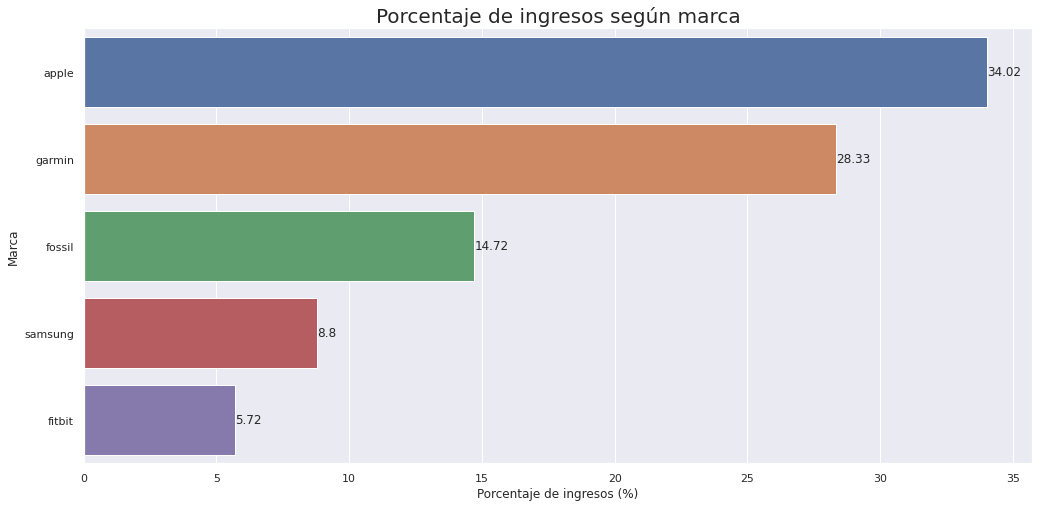

In [49]:
porcentajes = round(totalByBrand["Total Income"]*100/totalByBrand["Total Income"].sum(), 2)

totalByBrand["Income Percentage"] = porcentajes

sns.set(rc={'figure.figsize':(17,8)})

percByBrand = sns.barplot(x="Income Percentage", y="brand", data=totalByBrand[0:5].reset_index())

percByBrand.set_title('Porcentaje de ingresos según marca', fontsize = 20);

percByBrand.set(xlabel="Porcentaje de ingresos (%)", ylabel = "Marca");

percByBrand.bar_label(percByBrand.containers[0]);


### 7. Estudia la correlación entre las variables y represéntala de la forma que consideres más precisa (swarmplots, mapas de calor…). ¿Existe alguna correlación que llame especialmente la atención? Comenta los resultados.

In [50]:
datos_ratio.corr()

,selling_price,original_price,rating,avg_battery_days,ratio,reviews
selling_price,1.000000,0.982482,0.297304,0.142029,-0.452404,-0.371417
original_price,0.982482,1.000000,0.296131,0.189265,-0.461698,-0.420695
rating,0.297304,0.296131,1.000000,-0.162465,-0.198985,0.104887
avg_battery_days,0.142029,0.189265,-0.162465,1.000000,0.276965,-0.140554
ratio,-0.452404,-0.461698,-0.198985,0.276965,1.000000,0.194554
reviews,-0.371417,-0.420695,0.104887,-0.140554,0.194554,1.000000


Utilizar el método **corr()** a secas nos devuelve la correlación entre variables numéricas. Sin embargo, tenemos varias variables cualitativas que pueden ser de mucha utilidad, como **brand**, **type** o **model**. Las factorizaremos, guardaremos las etiquetas para revertir la factorización al final, y calcularemos de nuevo las correlaciones:

In [51]:
datos_cuant = datos_ratio.copy()

datos_cuant[["brand", "type", "model", "color", "display", "strap_material"]] = datos_ratio[["brand", "type", "model", "color", "display", "strap_material"]].apply(lambda x : pd.factorize(x)[0])
labels = datos_ratio[["brand", "type", "model", "color", "display", "strap_material"]].apply(lambda x : pd.factorize(x)[1])

datos_corr = datos_cuant.corr(method='pearson', min_periods=1)

datos_corr

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,ratio,reviews
brand,1.000000,0.606978,0.627144,0.312420,0.432939,0.434886,0.134827,0.160672,0.335063,0.008626,-0.419792,-0.287679
type,0.606978,1.000000,0.488786,0.218951,0.327010,0.345463,-0.109797,0.133344,0.247545,0.063692,-0.456978,-0.522342
model,0.627144,0.488786,1.000000,0.282345,0.544315,0.556900,0.221785,0.139043,0.258810,0.126175,-0.439511,-0.450750
color,0.312420,0.218951,0.282345,1.000000,0.265548,0.287825,0.030147,0.151256,0.128702,0.072632,-0.174571,0.109089
selling_price,0.432939,0.327010,0.544315,0.265548,1.000000,0.982482,0.459337,0.297304,0.401901,0.142029,-0.452404,-0.371417
original_price,0.434886,0.345463,0.556900,0.287825,0.982482,1.000000,0.415438,0.296131,0.384539,0.189265,-0.461698,-0.420695
display,0.134827,-0.109797,0.221785,0.030147,0.459337,0.415438,1.000000,0.238129,0.491210,-0.368516,-0.149105,0.411249
rating,0.160672,0.133344,0.139043,0.151256,0.297304,0.296131,0.238129,1.000000,0.267584,-0.162465,-0.198985,0.104887
strap_material,0.335063,0.247545,0.258810,0.128702,0.401901,0.384539,0.491210,0.267584,1.000000,-0.357088,-0.392690,-0.260890
avg_battery_days,0.008626,0.063692,0.126175,0.072632,0.142029,0.189265,-0.368516,-0.162465,-0.357088,1.000000,0.276965,-0.140554


Traslademos estos datos a un *heatmap*:

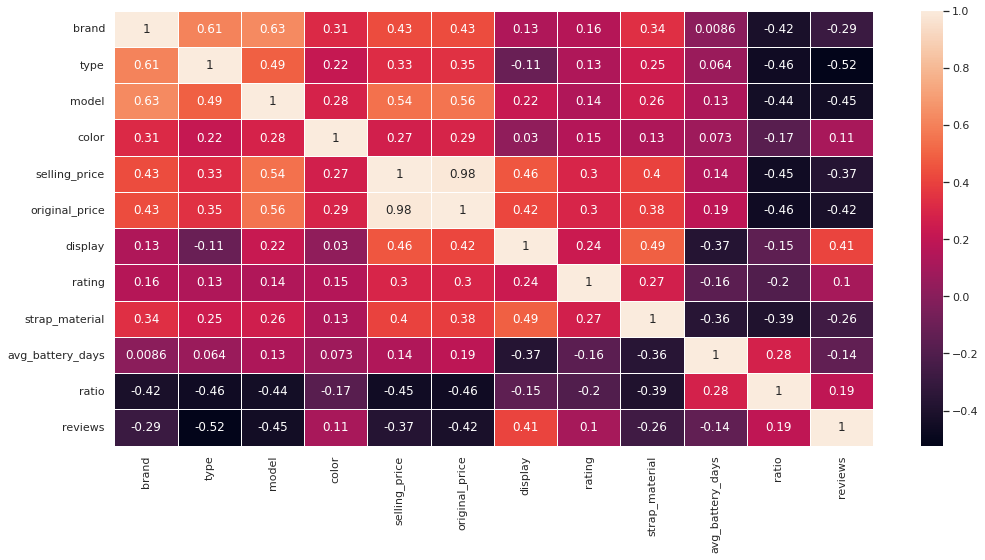

In [52]:
sns.heatmap(datos_corr, linewidths=.5, annot=True);

La alta correlación entre **selling_price** y **original_price** es trivial y no será tenida en cuenta. Pasa lo mismo con **brand** y **model**.

Existe cierta correlación positiva entre **brand** y **type**. Esto es indicativo de que las ventas según el tipo de dispositivo están asociadas a cada marca.

No sorprende que **model** esté relacionada con **original_price**, y algo menos con **selling_price**, que depende de la oferta bajo la cual se produjo la transacción.

El **color** no guarda apenas relación con las otras variables, aunque es cierto que si se desglosase en detalle podría encontrarse que ciertos colores son más caros que otros.

Existe cierta correlación entre el tipo de **display**, los precios y las reviews.

**type** también está relacionado con las **reviews**. Ya se profundizó en ello en apartados anteriores.

La **ratio** tiene correlaciones muy similares a **selling_price**, pero en negativo.

Resulta lógico que **avg_battery_days** tenga cierta correlación con **display**, puesto que unos tipos de pantallas consumen más que otros.

Finalmente, me gustaría señalar lo interesante que resulta la existencia de cierta correlación entre **display** y **strap_material**. Parece que puede haber un gran número de casos en los que vayan de la mano.

### 8. Representa mediante un boxplot el precio de los dispositivos por marca. Comenta los resultados.

En primer lugar crearemos una lista con las marcas ordenadas por mediana de **selling_price**, para ordenar el boxplot según la misma:

In [53]:
mediana_index = datos[["brand", "selling_price"]].groupby("brand").median().sort_values(by=["selling_price"], ascending = False).index

Pasamos a representar el boxplot:

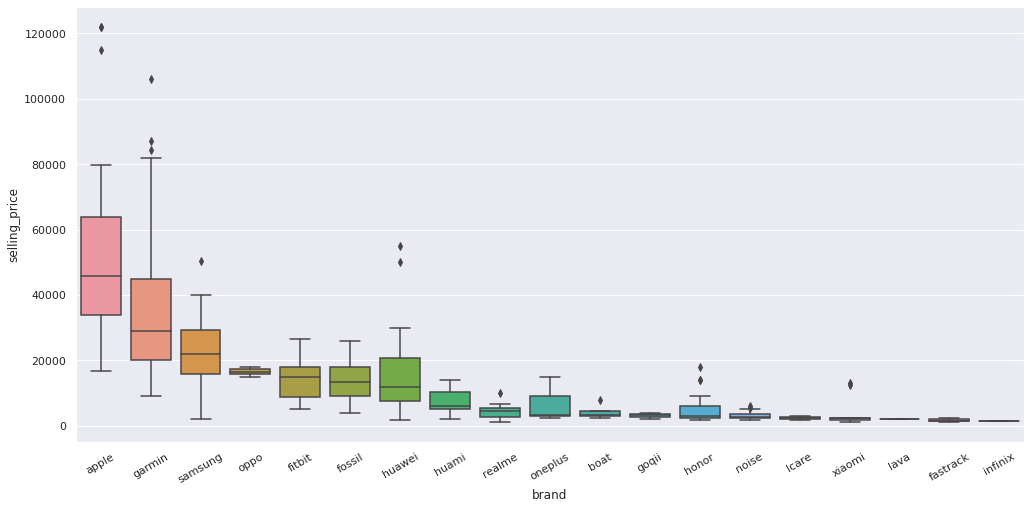

In [54]:
from matplotlib import pyplot as plt

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(17,8)})
bp = sns.boxplot(x = datos["brand"], y = datos["selling_price"], order = mediana_index);
bp.set_xticklabels(labels=mediana_index, rotation=30);
#bp.set(yscale="log");

Apoyándonos en la información de este gráfico, podemos dividir las marcas en **tres grupos**:

* **Precio alto**: Apple, Garmin y Samsung. Las tres marcas presentan una gran varianza.
* **Precio medio**: Oppo, Fitbit, Fossil y Huawei. Cabe mencionar que Huawei tiene una varianza que destaca en este grupo, ofreciendo algunos precios altos y en otros casos rozando los bajos. La varianza de Oppo es muy pequeña. O vendió pocos productos o todos tenían un precio muy similar.
* **Precio bajo**: el resto. Sin mirar apartados anteriores, tenemos las mismas dudas sobre la baja varianza que con Oppo.

### 9. Selecciona dos o más variables que te llamen la atención y analiza los datos mediante las gráficas o mediciones estadísticas que consideres oportunas y comenta los resultados que obtengas.

Visualizamos en un *pairgrid* las variables que nos llamaron más la atención en el apartado 7:

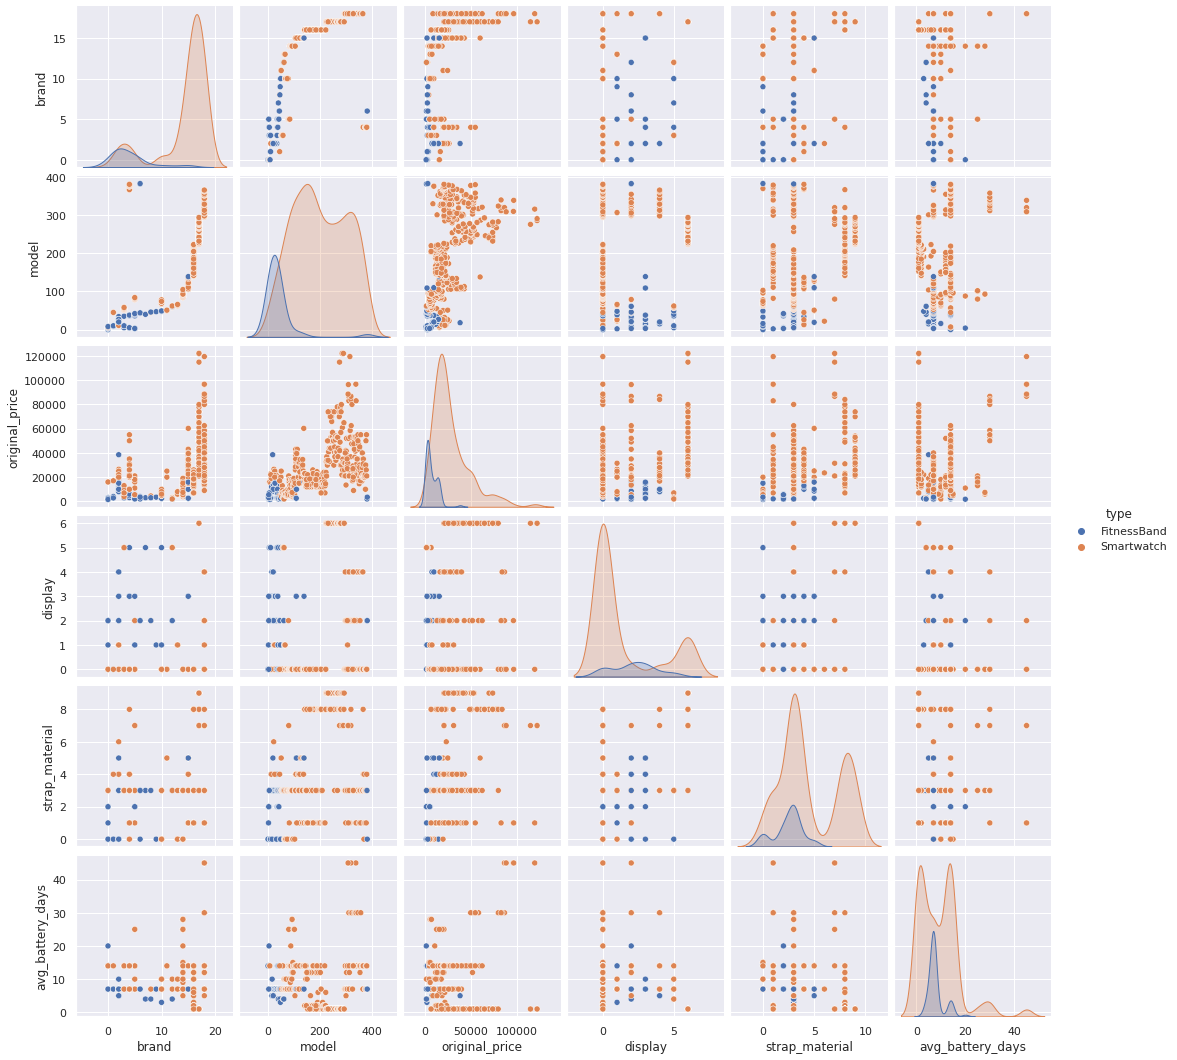

In [55]:
datos_cuant_dt = datos_cuant.copy()

datos_cuant_dt["type"] = datos["type"]

pp = sns.pairplot(datos_cuant_dt[["brand", "type", "model", "original_price", "display", "strap_material", "avg_battery_days"]], hue="type");

En este *pairgrid* se visualizan las variables de interés halladas en el apartado 7, en función de las demás variables de interés, con la particularidad de que **type** viene representada por el color, y no por otra fila y columna.

En los gráficos de dispersión resulta más evidente la relación entre **brand** con **model** y con **original_price**. Y entre **model** y **original_price**, como es de esperar. La relación entre el precio y el resto de variables es algo más complicada de visualizar en este tipo de gráficos, pero se puede profundizar más fácilmente en la relación de **type** con el resto de variables si echamos un vistazo a las gráficas de distribución de la diagonal.

Se puede comprobar, por ejemplo, que hay dos tipos de marcas: las que han vendido ambos tipos de dispositivo y las que se centran predominantemente en los SmartWatches.

También que, como se entreveía anteriormente, el precio de las FitnessBands está en la franja baja del de los Smartwatches. Incluso algo más abajo para los precios mínimos. Las FitnessBands son, en general, mucho más baratas que los Smartwatches.

En cuanto al **display**, rara vez coincide según el **type**.

Se ve que el **strap_material** del que están hecho las FitnessBands coincide con el de la mayoría de Smartwatches.

Finalmente, Se comprueba que la duración de la batería de las FitnessBands es bastante corta: entre 3 y 14 días. Los Smartwatches la tienen muy polarizada: o muy pocos días, o 14. Hay alguno más allá de las dos semanas.

Me ha llamado mucho la atención que las distribuciones de las prestaciones estén divididas en grupos tan claros:

* **display**: [0,2] y [3,6] (Solo para Smartwatches)
* **strap_material**: [0,5] y [6,10]
* **avg_battery_days**: [1,7], [8,14] y [15,45]

Me interesa saber cómo varía el precio en función de estas prestaciones.

Veamos qué sucede con el **display** de los Smartwatches:

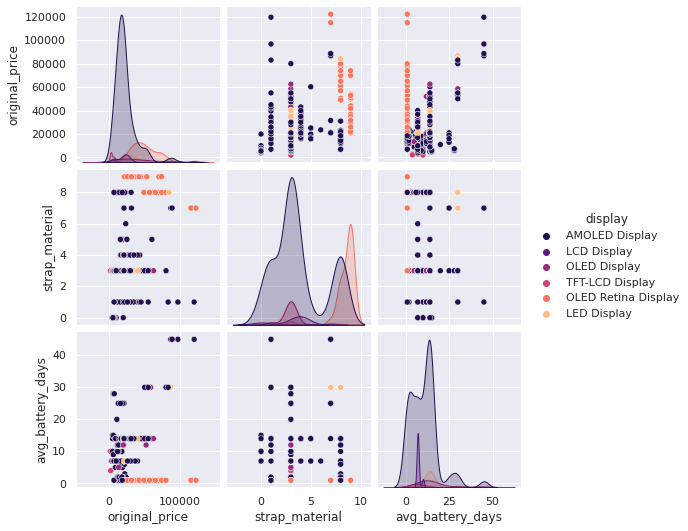

In [56]:
datos_cuant_dis = datos_cuant.copy()

datos_cuant_dis["display"] = datos["display"]

pp_dis_sw = sns.pairplot(datos_cuant_dis[["original_price", "display", "strap_material", "avg_battery_days"]].loc[(datos_cuant_dt["type"] == "Smartwatch")], hue="display", palette = "magma");

Se puede comprobar que existe los Smartwatches con display AMOLED son los más abundantes, con los precios más bajos y una duración de batería mayoritariamente de 14 días o menos.

No hay ni un solo Smartwatch con display PMOLED.

Parece haber una relación clara entre ciertos tipos de **display** y **strap_material**: **display** TFT-LCD van con correa de silicona, y los OLED Retina Display van con los **strap_material** de tela, nylon, acero inoxidable y aluminio.

A continuación analizaremos los dos grupos de **strap_material** previamente observados. Comenzamos con la mitad izquierda:

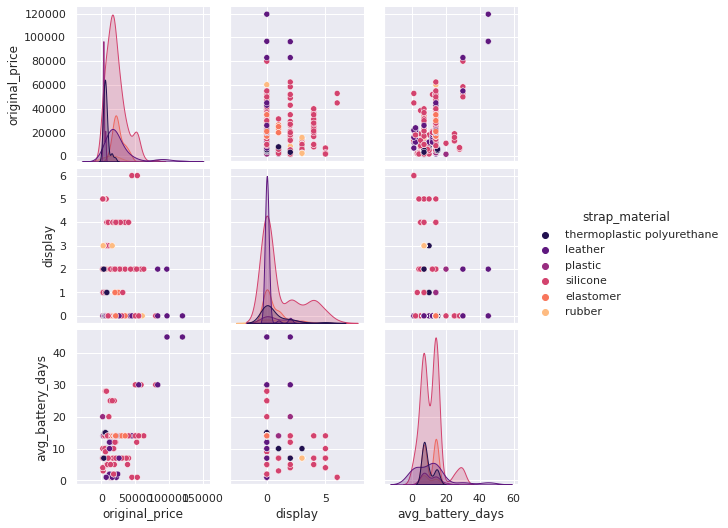

In [57]:
datos_cuant_strap = datos_cuant.copy()

datos_cuant_strap["strap_material"] = datos["strap_material"]

pp_sm1 = sns.pairplot(datos_cuant_strap[["original_price", "display", "strap_material", "avg_battery_days"]].loc[datos_cuant["strap_material"]<=5], hue="strap_material", palette = "magma");

Para este grupo, en general los precios se mantienen en la zona media-baja, siendo la silicona ligeramente más cara. Veamos el grupo de la derecha:

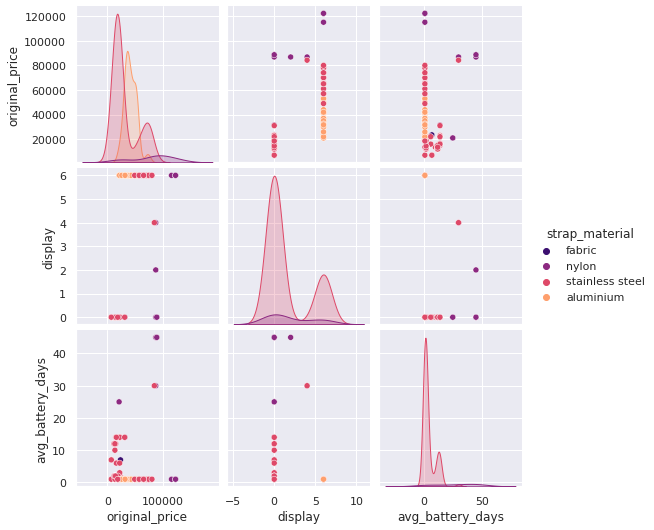

In [65]:
pp_sm2 = sns.pairplot(datos_cuant_strap[["original_price", "display", "strap_material", "avg_battery_days"]].loc[datos_cuant["strap_material"]>5], hue="strap_material", palette = "magma")

LosTrackers con correas más caras son los de nylon, y son pocos:

In [67]:
datos.loc[datos_cuant_strap["strap_material"]=="nylon"]

,brand,type,model,color,selling_price,original_price,display,rating,strap_material,avg_battery_days,reviews
132,honor,Smartwatch,GS Pro,black,13999,20999,AMOLED Display,4.4,nylon,25,215.0
133,honor,Smartwatch,GS Pro,blue,17999,20999,AMOLED Display,4.4,nylon,25,215.0
419,apple,Smartwatch,42 mm White Ceramic Case with Cloud Sport,cloud,114900,114900,OLED Retina Display,4.7,nylon,1,NaN
430,apple,Smartwatch,Series 3 GPS + Cellular- 42 mm Gray Ceramic Case,black,122090,122090,OLED Retina Display,4.6,nylon,1,NaN
435,apple,Smartwatch,Series 3 GPS + Cellular- 42 mm White Ceramic Case,black,122090,122090,OLED Retina Display,4.6,nylon,1,NaN
454,garmin,Smartwatch,Vivomove Style,"white, pink",26990,31490,AMOLED Display,3.3,nylon,14,NaN
455,garmin,Smartwatch,Fenix 6 Pro Solar,"grey, black",72990,88490,AMOLED Display,NaN,nylon,45,NaN
456,garmin,Smartwatch,Fenix 6X,"black, orange, red",79990,88490,AMOLED Display,NaN,nylon,45,NaN
458,garmin,Smartwatch,Fenix 6,"black, red, orange",76990,86690,LED Display,NaN,nylon,30,NaN
464,garmin,Smartwatch,Fenix 6,"grey, blue",77990,86690,OLED Display,NaN,nylon,45,NaN


LosTrackers con correa de nylon son todos Smartwatches de gama alta de Garmin, Apple y Honor.

Finalmente dividiremos el dataset según los grupos previamente distinguidos según **avg_battery_days**:

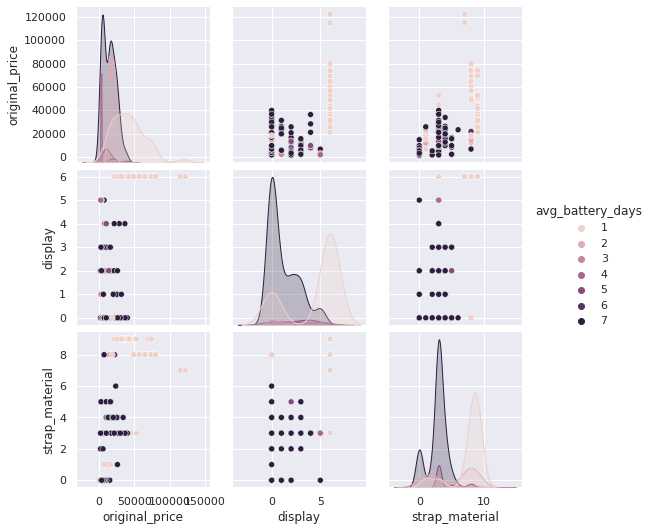

In [68]:
pp_bat1 = sns.pairplot(datos_cuant[["original_price", "display", "strap_material", "avg_battery_days"]].loc[datos_cuant["avg_battery_days"] <= 7], hue="avg_battery_days");

Generalmente, salvo un par de excepciones, un tracker con 7 días de batería o menos es barato. Hay algunos con tan solo un día, presumiblemente Smartwatches, que son muy caros:

In [61]:
list(set(datos.loc[(datos_cuant["avg_battery_days"] <= 7) & (datos_cuant["display"]==6)]["brand"]))


['apple']

Los Smartwatches que hay que cargar a diario generalmente son de marca Apple.

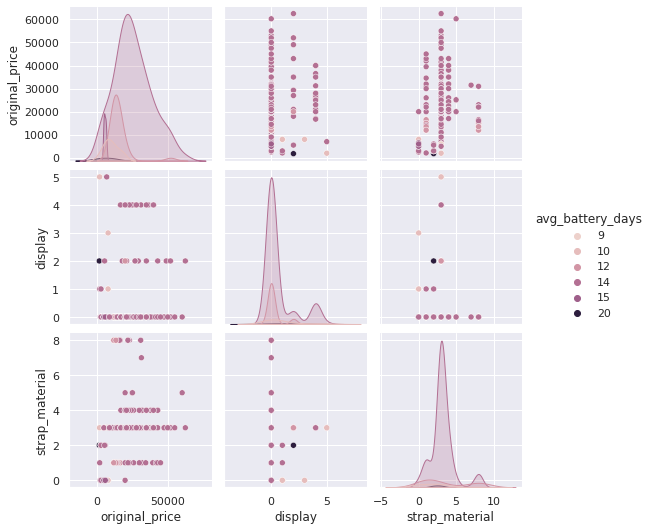

In [62]:
pp_bat1 = sns.pairplot(datos_cuant[["original_price", "display", "strap_material", "avg_battery_days"]].loc[datos_cuant["avg_battery_days"].between(8,20)], hue="avg_battery_days");

LosTrackers que tienen entre 7 y 20 días tienen en su mayoría 14, y el precio de la mayoría se encuentra en torno a las 35000 Rupias. Esta duración de batería puede ser un gran indicativo de gama media de precio.

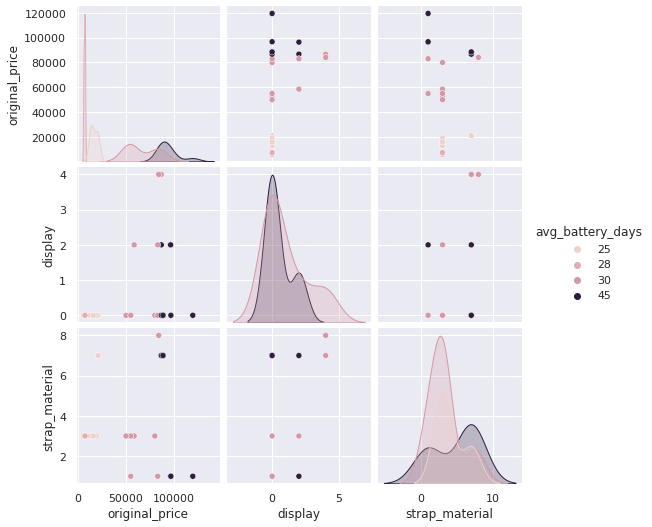

In [69]:
pp_bat1 = sns.pairplot(datos_cuant[["original_price", "display", "strap_material", "avg_battery_days"]].loc[datos_cuant["avg_battery_days"]>20], hue="avg_battery_days");

Un tracker de nuestro dataset que tenga 28 días o más de batería costará 50000 rupias o más.

Nótese que no se ha obtenido el OLED Retina Display en las gráficas de duración de batería superiores a 7 días, por lo que la inferencia de la primera gráfica se convierte en conclusión: la duración media de la batería de los Smartwatches de Apple es de 1 día.

### 10. Conclusiones del estudio

#### Conocimiento del dominio y valoración del dataset

Un Fitness Tracker se suele adquirir con un objetivo en mente, que suele el registro de la realización de actividad física de una manera continuada para su posterior análisis. Aunque también hay quien quiere únicamente un reloj digital, ya sea asequible o de lujo. Fuera de estos últimos casos, hay quien busca monitorizar únicamente los pasos durante el día, hay quien desea registrar sesiones de entrenamiento, y también están aquellos que desean un análisis más pormenorizado de estas cara a competiciones.

La división entre Fitness Bands y Smartwatches me parece un tanto polarizada. Atendiendo a esta división, en general, lo que se suele buscar en una Fitness Band es el registro de pasos, y a veces de actividad intensa. Estas son actividades que no consumen la batería rápidamente. A su vez, lo que se busca en los Smartwatches es la funcionalidad de un Smartphone (que también puede registrar actividades, pero sus funcionalidades consumen la batería más rápidamente). En este dataset no se encuentran aquellos dispositivos diseñados para el deportista moderado (por ejemplo: relojes Polar, Suunto, etc.) que persigue un objetivo sin necesidad de utilizar las funcionalidades típicas de un Smartphone.

Al tratarse de Fitness Trackers sería interesante cruzar estos datos con los de dispositivo de frecuencia cardíaca, GPS, registro del sueño y capacidad de la batería entre otros; que ayudarían a entender los Trackers con mayor precisión.


#### Conclusiones finales

Se han vendido muchos más Smartwatches que FitnessBands (86,7% frente a 13,3%), y dispositivos por debajo del precio medio que sobre el mismo. Los Smartwatches, en general, son más caros que las FitnessBands. Además de ser más caros sus precios fluctúan más, lo cual es lógico, dejando entrever que además de tener mayor calidad poseen un mayor abanico de prestaciones que en el caso de las FitnessBands.

Las FitnessBands tienen un ratio batería/precio superior al de los Smartwatches, debido al bajo precio de las primeras y al alto consumo de las funcionalidades de los segundos. La marca líder en este aspecto es Xiaomi. La duración media de la batería es una prestación que fluctúa mucho en los Smartwatches, con una desviación estándar de más de 8 días frente a los 3 de las FitnessBands. Esto parece darse porque existen Smartwatches con duración de batería muy grande (Garmin, hasta 45 días) y otros con una duración escasa (Apple, máximo 1 día).

Los ratings de los Trackers son, en general, generosos. Los Smartwatches están algo mejor valorados que las FitnessBands, especialmente aquellos con un precio de venta superior a la media. Según estos datos, las marcas con más ingresos son Apple, Garmin, Samsung, Fossil y Fitbit. En cuanto a disponibilidad de reviews, muy pocos artículos las tienen, y un 83,3% de esta información pertenece a los Smartwatches cuyo precio está bajo la media. Sin embargo, parece que los usuarios tienden a escribir muchas más reviews de FitnessBands, que superan con creces en número a las de los Smartwatches.

Finalmente, las tecnologías de display y los materiales de fabricación tienen impacto en el precio de venta. Los Trackers con tecnología LED y AMOLED suelen ser los más baratos, mientras que el OLED Retina Display de Apple es el más caro. En general, los Trackers con correa de Nylon son los más caros. Si se busca un precio intermedio, una buena opción es un Tracker con display TFT-LCD y correa de silicona.